In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


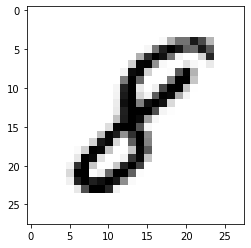

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 7777 
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
x_train.shape

(60000, 28, 28)

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [7]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


Using TensorFlow backend.
W0927 19:29:58.591530  2224 deprecation_wrapper.py:119] From C:\Users\Drishya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0927 19:29:58.605496  2224 deprecation_wrapper.py:119] From C:\Users\Drishya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0927 19:29:58.608771  2224 deprecation_wrapper.py:119] From C:\Users\Drishya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0927 19:29:58.623719  2224 deprecation_wrapper.py:119] From C:\Users\Drishya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0927 19:29:58.645694  2224 deprecation_wrapp

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

W0927 19:30:11.845241  2224 deprecation_wrapper.py:119] From C:\Users\Drishya\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0927 19:30:11.878152  2224 deprecation_wrapper.py:119] From C:\Users\Drishya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0927 19:30:11.949687  2224 deprecation.py:323] From C:\Users\Drishya\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 47s 782us/step - loss: 0.2034 - acc: 0.9398
Epoch 2/10
60000/60000 [==============================] - 47s 784us/step - loss: 0.0813 - acc: 0.9747
Epoch 3/10
60000/60000 [==============================] - 47s 792us/step - loss: 0.0583 - acc: 0.9817
Epoch 4/10
60000/60000 [==============================] - 47s 775us/step - loss: 0.0440 - acc: 0.9851
Epoch 5/10
60000/60000 [==============================] - 47s 780us/step - loss: 0.0368 - acc: 0.9877
Epoch 6/10
60000/60000 [==============================] - 46s 766us/step - loss: 0.0288 - acc: 0.9905
Epoch 7/10
60000/60000 [==============================] - 46s 762us/step - loss: 0.0243 - acc: 0.9918
Epoch 8/10
60000/60000 [==============================] - 47s 777us/step - loss: 0.0234 - acc: 0.9921
Epoch 9/10
60000/60000 [==============================] - 47s 778us/step - loss: 0.0202 - acc: 0.9934
Epoch 10/10
60000/60000 [==============================] - 46s 770us/step - loss: 

In [9]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 307us/step


[0.06165287914474684, 0.9847]

2


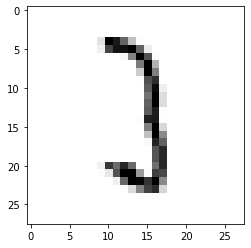

In [15]:
#wrong prediction
image_index = 4443
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

2


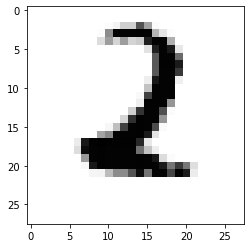

In [16]:
image_index = 4442
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())